##### TITLE
Combining Data With Pandas

##### OBJECTIVE
Analyze the 2015, 2016, and 2017 World Happiness Reports.

It's very common practice to work with more than one data set at a time, you may need to pull the data from multiple sources. 

##### DATA INTRODUCTION
These reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition.

Below is a preview of the 2015 report:

| Column      | Definition |
| :---------- | :--------- |
| Country  |Name of the country.|
| Region     | Name of the region the country belongs to.|
| Happiness Rank  |The rank of the country, as determined by its happiness score.|
| Happiness Score | A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.|

In [6]:
import pandas as pd

happiness2015 = pd.read_csv('./dataset/World_Happiness_2015.csv')
happiness2016 = pd.read_csv('./dataset/World_Happiness_2016.csv')
happiness2017 = pd.read_csv('./dataset/World_Happiness_2017.csv')

happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


##### Add a column called *Year*  to each dataframe with the corresponding year.

In [14]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

happiness2015.head()
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

##### Combining DataFrames With The Concat Function

![title](./img/Concat_1.png)
![title](./img/Concat_2.png)
![title](./img/Concat_3.png)


In [22]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016])
print(concat_axis0, '\n')
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)
print(concat_axis1)
 
question1 = 6
question2 = 3

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016 

       Country  Happiness Score  Year      Country  Happiness Score  Year
0  Switzerland            7.587  2015      Denmark            7.526  2016
1      Iceland            7.561  2015  Switzerland            7.509  2016
2      Denmark            7.527  2015      Iceland            7.501  2016


We notice from the above result, that we merely pushed the dataframes together vertically or horizontally - none of the values, column names, or indexes changed.
When you use the *Concat()* function to combine dataframes with the same shape and index, you can think of the function as 'gluing' dataframes together.
![title](./img/Concat_4.png)


##### Combining DataFrames with Different Shapes Using the Concat Function
If the dataframes have diferent shapes or columns, Let's see the concat() function's behavior when we cobine dataframes that don't have the same shape.

In [24]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016])
rows = 7
columns = 4
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


![title](./img/Concat_5.png)
Note that because the Standard Error column didn't exist in head_2016, **NaN** values were created to signify those values are missing. By default, the concat function will keep all of the data, no matter if missing values are created.

##### Re-setting Indexes
The indexes of the original dataframes didn't change. When duplicate indexes are created, it can be better to reset them, because they could cause erroors as we perform other data cleaning tasks.
The concat() has a parameter, **ignore_index**, that can be used to clear the existing index and reset it in the result.

In [25]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


##### Joining DataFrames with the Merge Function
The **pd.merge()** function can execute high performance database-style joins. Unlike the concat function, the merge function only combines dataframes horizontally(axis=1) and can only combine two dataframes at a time. 
It can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined. 

With the merge(), we will combine dataframes on a **key**, a shared index or column. When choosing a key, it's a good practice to use keys with unique values to avoid duplicating data. You can think of keys as creating a link from one dataframe to another using the common values or indexes. 

Below, we linked the dataframes using common values in the Country columns.
We use those common country values to join or merge the dataframes.
![title](./img/Merge_1.png)
![title](./img/Merge_2.png)
![title](./img/Merge_3.png)

![title](./img/Joins_1.png)

In [28]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


**Inner Join**

Since we joined the dataframes on the Country column, or used it as thee key, the merge()
function looked to match elements in the Country column in BOTH dataframes.
![title](./img/Merge_4.png)
This way of combining, or joining, data is called an inner join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.

##### Joining on Columns with the Merge Function
**Left Join**

Includes all of the rows from the 'left' dataframe along with any rows from the 'right' dataframe  with a common key; the result retains all columns from both of the original dataframes.

In [29]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')
# Left Joins
merged_left = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_left_updated = pd.merge(left=three_2016, right=three_2015,
                               how='left', on='Country')
merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


The merge function added a suffix of either **_x** or **_y** to columns of the same name to distinguish between them.
![title](./img/LeftJoin_2.png)

##### Left Joins with the Merge Function
1. Changing the join type from an inner join to a left join resulted in a dataframe with more rows and created **NaN**'s.
2. When using a left join, interchanging the dataframes assigned to the left and right parameters changes the results.
![title](./img/LeftJoin_1.png)
A left join includes all of the rows from the 'left' dataframe along with any rows from the 'right' dataframe with a common key.

Since the country column was used as the key, only countries that appear in BOTH dataframes have a value in every column. 'Norway' was the only value in the 'Country' column in BOTH dataframes, so it's the only row with a value in every column.
When we interchanged the 'left' and the 'right' dataframes, the values changed.

In [30]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left', on='Country', suffixes=('_2016', '_2015'))
merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


##### Join on Index with the merge Function
When we join on index, our result will contain only common indexes
![title](./img/IndexJoin_1.png)

In [34]:
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015, right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
rows = 4
columns = 6
merge_index_left = pd.merge(left=four_2015, right=three_2016, how='left', left_index=True, right_index=True, suffixes=('_2015','_2016'))
merge_index
#merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


##### Summary
![title](./img/JoinsSummary_1.png)

##### Combine Data & Create a Visualization
**Did world happiness increase, decrease, or stay about the same from 2015 to 2017**

<AxesSubplot:title={'center':'Mean Happiness Scores by Year'}, ylabel='Year'>

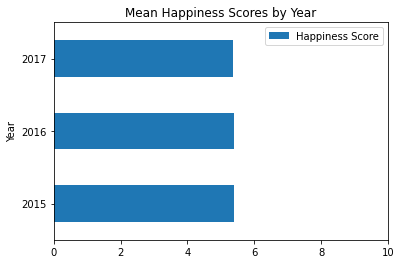

In [37]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
combined = pd.concat([happiness2015, happiness2016, happiness2017])
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0, 10))